In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
from ipywidgets import interact

%matplotlib qt

'jupyter' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
def log_eqt(x, t, lm ):
    """
    Returns the Logistic equation for x and lambda
    """
    return lm * x * (1 - x)

def log_eq(x, lm):
    """
    Returns the Logistic equation for x and lambda
    """
    return lm * x * (1 - x)

In [5]:
lm = 1 + 2 * math.sqrt(2)

#define time range
timespan = (0., 1.)
init = 1 #number of initial conditions

#initial conditions
x0 = 1

initial_conditions = [x0]

sol = solve_ivp(lambda t, lm, x: log_eqt(x, t, lm), t_span=timespan, y0=initial_conditions, max_step=0.01, args=(lm, ))


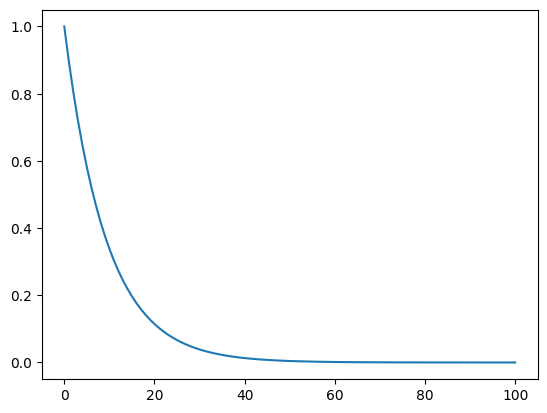

In [39]:
y = sol.y[0]
plt.plot(y)

In [49]:
timespan = (0., 200.)

for x0 in np.linspace(-1, 1, 100):
    initial_conditions = [x0]
    sol = solve_ivp(lambda t, lm, x: log_eqt(log_eqt(log_eqt(x, t, lm), t, lm), t, lm), t_span=timespan, y0=initial_conditions, max_step=0.01, args=(lm,))

    plt.plot(sol.y[0])

In [55]:
x0 = 0.5

def f(x):
    return 8 * x / (1 + 2 * x)

num_iterations = 4
iterates = [x0]

for i in range(num_iterations):
    x_next = log_eq(iterates[-1], lm)
    iterates.append(x_next)

x_range = np.linspace(0, 1, 100)
y_f = [log_eq(x, lm) for x in x_range]

plt.plot(x_range, y_f, label='f(x)')
plt.plot(x_range, x_range, label='x')
plt.plot(iterates, iterates, 'ro-')
plt.legend()
plt.grid()
plt.show()

In [18]:
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt


# Use LaTeX throughout the figure for consistency
# Figure dpi
dpi = 72

def plot_cobweb(f, r, x0, nmax=50):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    dpi = 100
    x = np.linspace(0, 1, 500)
    fig = plt.figure(figsize=(600/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r), c='#444444', lw=2)
    ax.plot(x, x, c='#444444', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    px, py = np.empty((2,nmax+1,2))
    px[0], py[0] = x0, 0
    for n in range(1, nmax, 2):
        px[n] = px[n-1]
        py[n] = f(px[n-1], r)
        px[n+1] = py[n]
        py[n+1] = py[n]

    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)

    # Annotate and tidy the plot.
    ax.minorticks_on()
    ax.grid(which='minor', alpha=0.5)
    ax.grid(which='major', alpha=0.5)
    ax.set_aspect('equal')
    ax.set_xlabel('$x$')
    ax.set_ylabel('$f(x)$')
    ax.set_title('$x_0 = {:.1}, r = {:.3}$'.format(x0, r))

    def f(x, r):
        return r*x*(1-x)
r = lm
@interact(x0 = (0, 1, 0.01), f = log_eq, r = lm)
def plot(f, r, x0):
    plot_cobweb(f, r, x0)

ValueError: <function log_eq at 0x000001F180AC8B80> cannot be transformed to a widget